<a href="https://colab.research.google.com/github/abdumalikh44/Visual-ML-Model-Random-Forest/blob/main/Random_Forest_Classification_Visual%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation


In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
#Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [ ]:
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ML S5/UAS/datasheet.xlsx")

In [ ]:
df = df[df.CO2 != 0.0]

In [ ]:
#delete missing value
df.dropna(axis=0, inplace=True)

In [ ]:
df

,CO,CO2,waktu
0,167.0,360.0,15:02:02
1,30.0,133.0,15:02:11
2,64.0,196.0,17:54:11
3,155.0,155.0,13:31:29
5,64.0,195.0,17:54:32
...,...,...,...
1192,82.0,177.0,18:45:43
1193,89.0,182.0,18:46:04
1196,115.0,297.0,19:54:34
1197,82.0,253.0,19:55:35


In [ ]:
# Using DataFrame.insert() to add a column
default_value = None
df['label'] = default_value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      1127 non-null   float64
 1   CO2     1127 non-null   float64
 2   waktu   1127 non-null   object 
 3   label   0 non-null      object 
dtypes: float64(2), object(2)
memory usage: 44.0+ KB


In [ ]:
df.head()

,CO,CO2,waktu,label
0,167.0,360.0,15:02:02,None
1,30.0,133.0,15:02:11,None
2,64.0,196.0,17:54:11,None
3,155.0,155.0,13:31:29,None
5,64.0,195.0,17:54:32,None


## Classification Category


In [ ]:
df.loc[(df['CO'] > 0) & (df['CO'] < 150) & (df['CO2'] > 0) & (df['CO2'] < 150), 'category'] = 'Baik'
df.loc[(df['CO'] > 150) & (df['CO'] < 300) & (df['CO2'] > 150) & (df['CO2'] < 300), 'category'] = 'Buruk'
df.loc[(df['CO'] > 300)  & (df['CO2'] > 300), 'category'] = 'Toxic'

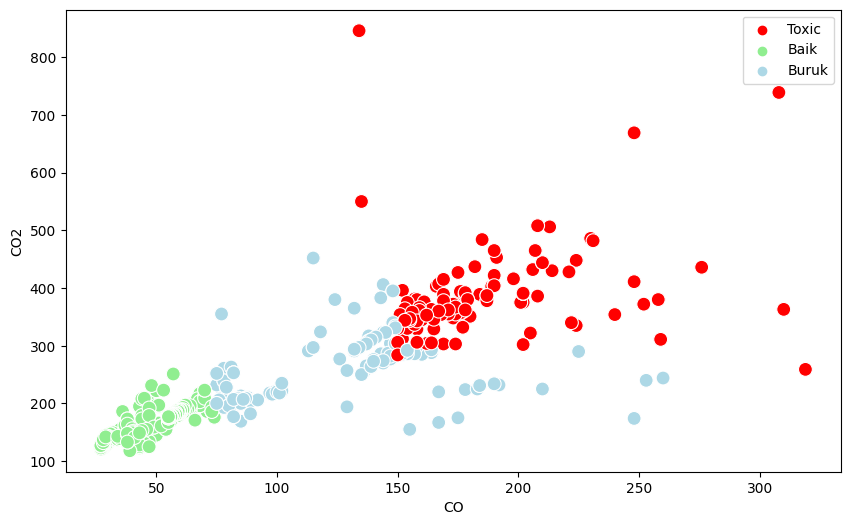

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = {'Baik': 'lightgreen', 'Buruk': 'lightblue', 'Toxic': 'red'}
sns.scatterplot(x='CO', y='CO2', hue='category', data=df, palette=custom_palette, s=100)
plt.xlabel('CO')
plt.ylabel('CO2')
plt.legend()
plt.show()


In [ ]:
# Tampilkan hasil pengkategorian
print(df[['CO', 'CO2', 'category']])

         CO    CO2 category
0     167.0  360.0    Toxic
1      30.0  133.0     Baik
2      64.0  196.0     Baik
3     155.0  155.0    Buruk
5      64.0  195.0     Baik
...     ...    ...      ...
1192   82.0  177.0    Buruk
1193   89.0  182.0    Buruk
1196  115.0  297.0    Buruk
1197   82.0  253.0    Buruk
1198   70.0  223.0     Baik

[1127 rows x 3 columns]


##Model Random Forests



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

*Preprocessing Data for Random Forests*

In [ ]:
# pemetaan dari category ke label
category_to_label = {'Baik': 0, 'Buruk': 1, 'Toxic': 2}
df['label'] = df['category'].map(category_to_label)

In [ ]:
X_classification = df[['CO', 'CO2']]
y_classification = df['label']
y_classification.fillna(y_classification.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
X_test.fillna(X_test.median(), inplace=True)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
prediction = rf.predict(X_test)
print(prediction)

[1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 2 0 1 0 1 1 0 0 0 0 1 0 2 2 0 2 0 1 0 2 2 2
 0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 2 0 1 0 2 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 2 1 0 2 0 0 0 0 0 0 2 2 0 0 1 1 0 2 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 2 0 0 1 0 1 0 0 2 1 0 0 2 2 2 0 0 1 1 0 2 1 2 0 2 0 0 0 1
 2 0 0 0 0 2 2 1 0 0 0 1 1 2 0 2 1 0 2 0 0 1 0 1 0 2 0 1 0 1 2 0 0 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 2 0 2 1 2 2 1 0 0 0 0 1 0 0 2 1 1 0 1 0 1 0 2 2 1 0 2
 0 2 0 0]


accuracy the Model*

In [ ]:
# Menghitung confusion matrix dan akurasi
rf_conf_matrix = confusion_matrix(y_test, prediction)
rf_acc_score = accuracy_score(y_test,prediction)

In [ ]:
print(rf_acc_score)
print(rf_conf_matrix)

0.995575221238938
[[125   0   0]
 [  0  59   1]
 [  0   0  41]]


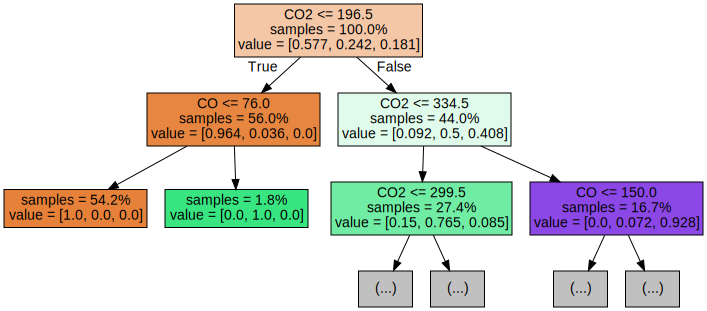

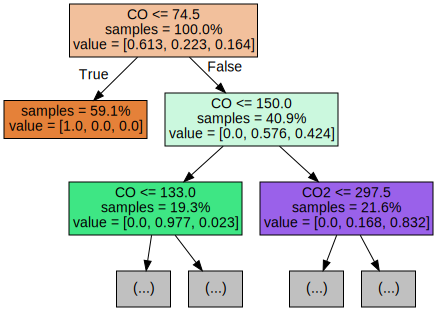

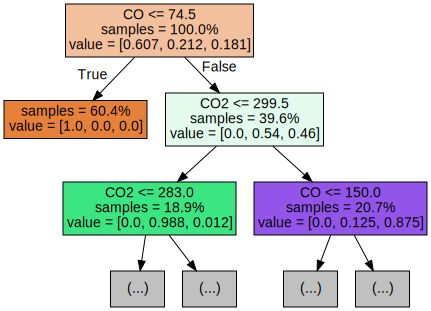

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

##Testing Model


In [ ]:
# Baca data baru dari file CSV
new_data = pd.read_excel("/content/drive/MyDrive/ML S5/UAS/train.xlsx")

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CO      5 non-null      int64
 1   CO2     5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
new_data.head()

,CO,CO2
0,19,110
1,510,453
2,213,345
3,245,356
4,21,116


In [ ]:
predictions = rf.predict(new_data)

print("Hasil Prediksi:")
print(predictions)


Hasil Prediksi:
[0 2 2 2 0]


##Pickle

In [ ]:
import pickle

pkl_filename = "/content/drive/MyDrive/ML S5/UAS/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)